## Creating a simple model
Here we show how to create a basic model using basiCO, and simulating it. We start as usual by importing basiCO. 

In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
from basico import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now lets create a new model, passing along the `name` that we want to give it. Additional supported parameters for the model consist of: 

* `quantity_unit`: which sets the unit to use for species concentrations (defaults to mol)
* `volume_unit`: the unit to use for three dimensional compartments (defaults to litre (l))
* `time_unit`: the unit to use for time (defaults to second (s))
* `area_unit`: the unit to use for two dimensional compartments
* `length_unit`: the unit to use for one dimensional compartments

In [2]:
new_model(name='Simple Model');

now we add a basic rection that converts a chemical species `A` irreversibly into `B`. We can do that by just calling `addReaction` with the chemical formula to use. In this case this would be: `A -> B`. The reaction will be automatically created using mass action kinetics.  

In [3]:
add_reaction('R1', 'A -> B');

Since we had a new model, this created the Species `A` and `B` as well as a compartment `compartment`, in which those chemicals reside. The species have an initial concentration of 1. To verify we can call `get_species`, which returns a dataframe with all information about the species (either all species, or the one filtered to): 


In [4]:
get_species().initial_concentration

name
A    1.0
B    1.0
Name: initial_concentration, dtype: float64

to change the initial concentration, we use `set_species`, and specify which property we want to change: 

In [5]:
set_species('B', initial_concentration=0)
set_species('A', initial_concentration=10)
get_species().initial_concentration

name
A    10.0
B     0.0
Name: initial_concentration, dtype: float64

to see the kinetic paramters of our recation we can use `get_reaction_parameters`, and we see that the parameter has been created by default with a value of `0.1`

In [6]:
get_reaction_parameters()

,value,reaction,type,mapped_to
name,,,,
(R1).k1,0.1,R1,local,


to change that parameter, we use `set_reaction_parameters`, specifying the value to be changed: 

In [7]:
set_reaction_parameters('(R1).k1', value=1)
get_reaction_parameters('k1')

,value,reaction,type,mapped_to
name,,,,
(R1).k1,1.0,R1,local,


now lets simulate our model for 10 seconds:

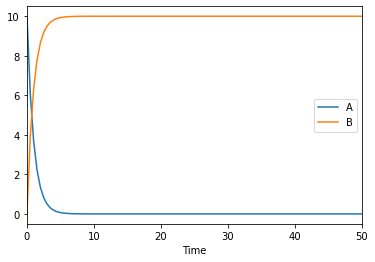

In [8]:
result = run_time_course(duration=50)
result.plot();


In [9]:
get_functions(reversible=False)

,reversible,formula,general
name,,,
Allosteric inhibition (MWC),False,V*(substrate/Ks)*(1+(substrate/Ks))^(n-1)/(L*(...,False
Catalytic activation (irrev),False,V*substrate*Activator/((Kms+substrate)*(Ka+Act...,False
Competitive inhibition (irr),False,V*substrate/(Km+substrate+Km*Inhibitor/Ki),False
Constant flux (irreversible),False,v,False
Henri-Michaelis-Menten (irreversible),False,V*substrate/(Km+substrate),False
Hill Cooperativity,False,V*(substrate/Shalve)^h/(1+(substrate/Shalve)^h),False
Hyperbolic modifier (irrev),False,V*substrate*(1+b*Modifier/(a*Kd))/(Km*(1+Modif...,False
Mass action (irreversible),False,k1*PRODUCT<substrate_i>,False
Mixed activation (irrev),False,V*substrate*Activator/(Kms*(Kas+Activator)+sub...,False
